In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# umap 실습

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OneHotEncoder
import matplotlib.lines as mlines
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=0c6e94681612e8d93ba3d879fcc878d27f70c9e86a8c5b10c4606f86b4d01a50
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [5]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=d9f98434a3c9a5f1cab462288d69239b2840633fc6d8b6162d9fff7ec284db85
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [6]:
import pandas as pd
import numpy as np
import umap
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OneHotEncoder
import matplotlib.lines as mlines
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv', encoding='utf-8')
# '승차인원' 변수 생성
df['승차인원'] =df['승차인원_0809']
# '하차인원' 변수 생성
df['하차인원'] = df['하차인원_0708']
# 필요한 변수들 제거
variables_to_drop = ['승차인원_0708', '승차인원_0809', '승차인원_0910', '하차인원_0708', '하차인원_0809', '하차인원_0910']
df.drop(columns=variables_to_drop, inplace=True)

In [8]:
df.head()

,호선명,지하철역,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,반경 내 대학교 수,...,출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,2,강남,3,4.551724,831737.0,5,5,0,6,1,...,2311,88696,4832,7179,3076,325838,1869,7809,60473,138873
1,2,강변,2,4.581897,315530.0,2,9,0,7,0,...,2316,122460,1803,3298,2205,88296,2753,2462,107711,24293
2,2,건대입구,5,4.600877,374321.0,10,11,1,2,2,...,2599,130241,3677,2820,2705,98437,2361,2936,88230,24521
3,2,교대,3,4.500000,367316.0,8,6,0,4,2,...,2654,95422,3046,5008,2009,186677,1936,4732,34642,52910
4,2,구로디지털단지,3,4.565217,731249.0,7,10,1,8,0,...,1788,95008,2718,2629,2646,416612,1962,5980,174194,79227


In [9]:
df[df['환승유입인원수'].isnull()]

,호선명,지하철역,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,반경 내 대학교 수,...,출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
239,9,가양,2,9.975490,NaN,0,15,4,11,0,...,2112,124000,3433,4379,2212,171456,2792,4852,74705,24869
240,9,개화,2,10.068627,NaN,0,3,2,0,0,...,1182,64106,1383,2479,1121,43196,2138,2286,8443,3162
241,9,고속터미널,4,9.778186,NaN,0,10,0,7,1,...,3374,94829,5862,6023,3169,175030,2010,4759,20397,18480
242,9,공항시장,2,9.566038,NaN,0,7,0,1,0,...,1308,85613,2921,3583,1537,99066,2633,4360,10554,1973
243,9,구반포,2,9.299383,NaN,0,9,1,3,0,...,180,3367,364,614,155,9469,96,539,1974,2925
244,9,국회의사당,2,9.416667,NaN,0,1,2,0,0,...,2586,87055,10528,4893,2251,1253964,1705,16676,6523,40762
245,9,김포공항,5,10.014706,NaN,0,3,0,0,0,...,1182,64106,1383,2479,1121,43196,2138,2286,9830,20509
246,9,노들,2,9.291667,NaN,0,4,1,8,1,...,1734,120018,2170,3117,1636,76968,2476,2528,20419,2393
247,9,노량진,3,9.861905,NaN,0,2,3,4,1,...,1734,120018,2170,3117,1636,76968,2476,2528,88617,39459
248,9,당산,5,9.926329,NaN,0,9,1,9,0,...,2048,144311,2075,4332,1972,117397,2150,3382,59382,14836


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선명                 277 non-null    int64  
 1   지하철역                277 non-null    object 
 2   총층수                 277 non-null    int64  
 3   출근_상내선_배차간격         277 non-null    float64
 4   환승유입인원수             252 non-null    float64
 5   총사고발생수              277 non-null    int64  
 6   반경 내 학교 수           277 non-null    int64  
 7   반경 내 주요공원 수         277 non-null    int64  
 8   반경 아파트 수            277 non-null    int64  
 9   반경 내 대학교 수          277 non-null    int64  
 10  공공 자전거 시설 수         277 non-null    int64  
 11  출근시간 혼잡도 평균(상선,내선)  277 non-null    float64
 12  출근출발_HH             277 non-null    int64  
 13  출근출발_HW             277 non-null    int64  
 14  출근출발_WH             277 non-null    int64  
 15  출근출발_WW             277 non-null    int64  
 16  출근도착_HH 

In [11]:
import seaborn as sns

#데이터 전처리

In [12]:
selected_columns = ['안전시설지수(승강장연결,스크린도어,안전발판)',
                         '열차내 사고',
                         '역구내 사고',
                         '출입문관련',
                         '승강설비관련',
                         '발빠짐',
                         '기타',
                         '반경 내 대학교 수',
                         '반경 내 대학 수']
df = df.drop(columns=['반경 내 대학교 수','지하철역']);df

# # '승차인원' 변수 생성
# df['승차인원'] = df['승차인원_0708'] + df['승차인원_0809'] + df['승차인원_0910']

# # '하차인원' 변수 생성
# df['하차인원'] = df['하차인원_0708'] + df['하차인원_0809'] + df['하차인원_0910']

# # 필요한 변수들 제거
# variables_to_drop = ['승차인원_0708', '승차인원_0809', '승차인원_0910', '하차인원_0708', '하차인원_0809', '하차인원_0910']
# df.drop(columns=variables_to_drop, inplace=True)

,호선명,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,2,3,4.551724,831737.0,5,5,0,6,4,41.7,2311,88696,4832,7179,3076,325838,1869,7809,60473,138873
1,2,2,4.581897,315530.0,2,9,0,7,5,71.0,2316,122460,1803,3298,2205,88296,2753,2462,107711,24293
2,2,5,4.600877,374321.0,10,11,1,2,6,58.4,2599,130241,3677,2820,2705,98437,2361,2936,88230,24521
3,2,3,4.500000,367316.0,8,6,0,4,2,42.3,2654,95422,3046,5008,2009,186677,1936,4732,34642,52910
4,2,3,4.565217,731249.0,7,10,1,8,6,79.4,1788,95008,2718,2629,2646,416612,1962,5980,174194,79227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,9,2,9.834559,102264.0,0,7,1,2,4,24.0,510,30392,760,1095,595,37745,585,1157,10184,4908
273,9,2,8.483333,193255.0,0,5,2,5,3,0.0,1753,92260,2647,2773,1580,69286,2374,2377,41711,11296
274,9,3,9.496855,NaN,0,14,3,17,5,82.0,1787,120945,1677,2944,1487,74980,2054,2205,22499,8472
275,9,2,9.343939,44635.0,0,7,1,0,5,7.0,755,37458,2137,2439,683,32701,961,1286,8547,2102


In [13]:
df.head()

,호선명,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,2,3,4.551724,831737.0,5,5,0,6,4,41.7,2311,88696,4832,7179,3076,325838,1869,7809,60473,138873
1,2,2,4.581897,315530.0,2,9,0,7,5,71.0,2316,122460,1803,3298,2205,88296,2753,2462,107711,24293
2,2,5,4.600877,374321.0,10,11,1,2,6,58.4,2599,130241,3677,2820,2705,98437,2361,2936,88230,24521
3,2,3,4.500000,367316.0,8,6,0,4,2,42.3,2654,95422,3046,5008,2009,186677,1936,4732,34642,52910
4,2,3,4.565217,731249.0,7,10,1,8,6,79.4,1788,95008,2718,2629,2646,416612,1962,5980,174194,79227


##이상치 확인

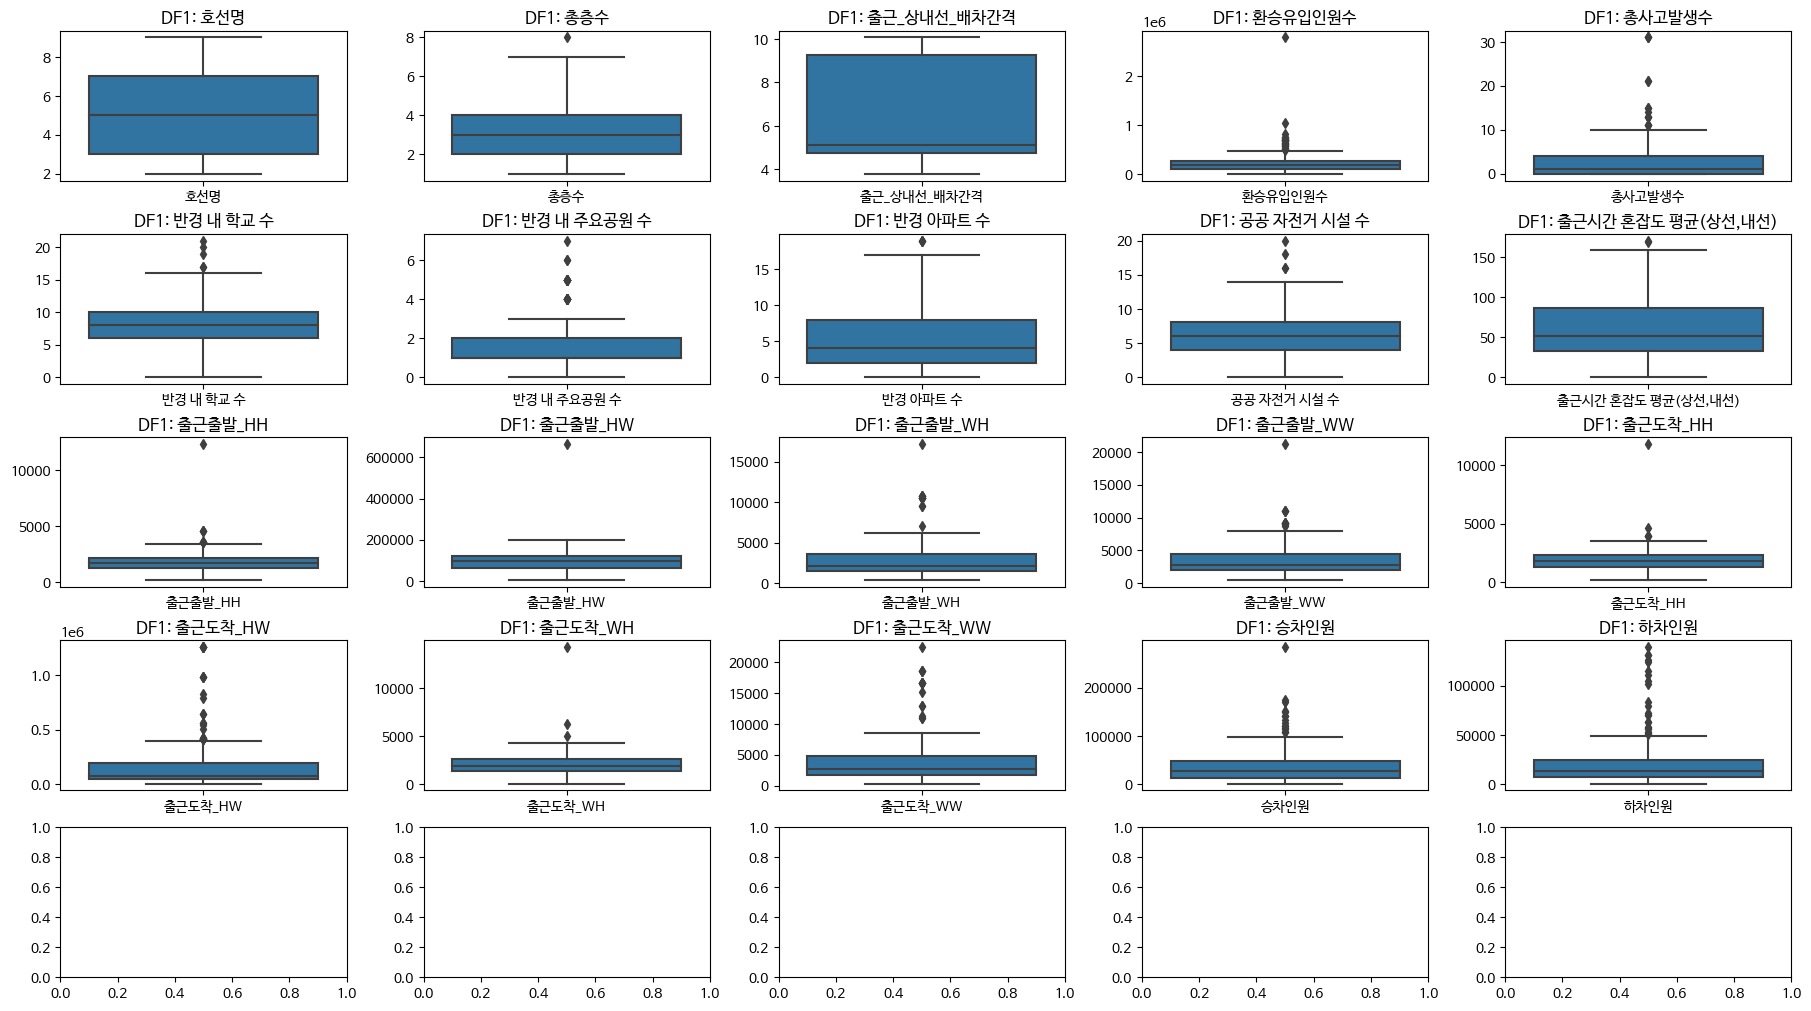

In [15]:
# 그래프를 그릴 캔버스 생성
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()

# 각 변수에 대한 Boxplot 그리기 (첫 번째 데이터프레임)
for i, variable in enumerate(df.columns):
    sns.boxplot(x='variable', y='value', data=pd.melt(df[[variable]]), ax=axes[i])
    axes[i].set_title(f'DF1: {variable}')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

# 그래프 보여주기
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선명                 277 non-null    int64  
 1   총층수                 277 non-null    int64  
 2   출근_상내선_배차간격         277 non-null    float64
 3   환승유입인원수             252 non-null    float64
 4   총사고발생수              277 non-null    int64  
 5   반경 내 학교 수           277 non-null    int64  
 6   반경 내 주요공원 수         277 non-null    int64  
 7   반경 아파트 수            277 non-null    int64  
 8   공공 자전거 시설 수         277 non-null    int64  
 9   출근시간 혼잡도 평균(상선,내선)  277 non-null    float64
 10  출근출발_HH             277 non-null    int64  
 11  출근출발_HW             277 non-null    int64  
 12  출근출발_WH             277 non-null    int64  
 13  출근출발_WW             277 non-null    int64  
 14  출근도착_HH             277 non-null    int64  
 15  출근도착_HW             277 non-null    int64  
 16  출근도착_WH 

##이상치 많은 데이터 및 왜도를 위해 로그변환

In [17]:
selected_columns = df.drop(columns=['출근시간 혼잡도 평균(상선,내선)','출근_상내선_배차간격'],axis=1).columns.to_list()
scaled_df = df.copy()
scaled_df[selected_columns] = np.log1p(scaled_df[selected_columns])

In [18]:
scaled_df.head()

,호선명,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,1.098612,1.386294,4.551724,13.631273,1.791759,1.791759,0.000000,1.945910,1.609438,41.7,7.745868,11.392981,8.483223,8.879055,8.031710,12.694159,7.533694,8.963160,11.009969,11.841322
1,1.098612,1.098612,4.581897,12.662012,1.098612,2.302585,0.000000,2.079442,1.791759,71.0,7.748029,11.715548,7.497762,8.101375,7.698936,11.388461,7.920810,7.809135,11.587216,10.097985
2,1.098612,1.791759,4.600877,12.832872,2.397895,2.484907,0.693147,1.098612,1.945910,58.4,7.863267,11.777150,8.210124,7.944847,7.903227,11.497182,7.767264,7.985144,11.387714,10.107326
3,1.098612,1.386294,4.500000,12.813981,2.197225,1.945910,0.000000,1.609438,1.098612,42.3,7.884200,11.466075,8.021913,8.518992,7.605890,12.137140,7.568896,8.462315,10.452851,10.876367
4,1.098612,1.386294,4.565217,13.502511,2.079442,2.397895,0.693147,2.197225,1.945910,79.4,7.489412,11.461727,7.908019,7.874739,7.881182,12.939913,7.582229,8.696343,12.067931,11.280085


## 차원축소전 표준화

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# 스케일링할 변수들 선택
selected_columns = scaled_df.columns.to_list()

# RobustScaler 객체를 생성합니다.
ss = StandardScaler()

# 선택한 변수들에 대해 스케일링 수행
scaled_df[selected_columns] = ss.fit_transform(scaled_df[selected_columns])

In [20]:
df.drop('출근시간 혼잡도 평균(상선,내선)',axis=1).columns.to_list()

['호선명',
 '총층수',
 '출근_상내선_배차간격',
 '환승유입인원수',
 '총사고발생수',
 '반경 내 학교 수',
 '반경 내 주요공원 수',
 '반경 아파트 수',
 '공공 자전거 시설 수',
 '출근출발_HH',
 '출근출발_HW',
 '출근출발_WH',
 '출근출발_WW',
 '출근도착_HH',
 '출근도착_HW',
 '출근도착_WH',
 '출근도착_WW',
 '승차인원',
 '하차인원']

In [21]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선명                 277 non-null    float64
 1   총층수                 277 non-null    float64
 2   출근_상내선_배차간격         277 non-null    float64
 3   환승유입인원수             252 non-null    float64
 4   총사고발생수              277 non-null    float64
 5   반경 내 학교 수           277 non-null    float64
 6   반경 내 주요공원 수         277 non-null    float64
 7   반경 아파트 수            277 non-null    float64
 8   공공 자전거 시설 수         277 non-null    float64
 9   출근시간 혼잡도 평균(상선,내선)  277 non-null    float64
 10  출근출발_HH             277 non-null    float64
 11  출근출발_HW             277 non-null    float64
 12  출근출발_WH             277 non-null    float64
 13  출근출발_WW             277 non-null    float64
 14  출근도착_HH             277 non-null    float64
 15  출근도착_HW             277 non-null    float64
 16  출근도착_WH 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


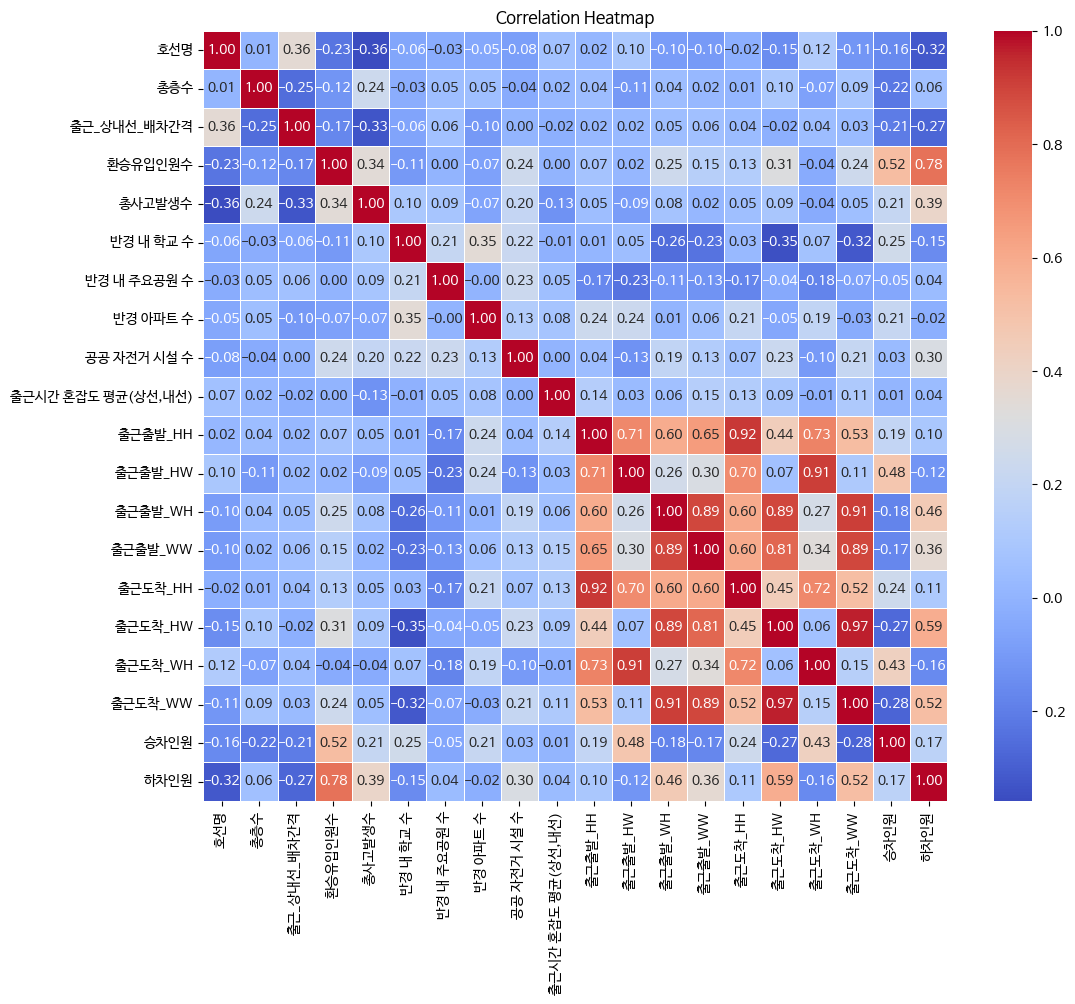

In [22]:
# 히트맵 데이터 추출
heatmap_data = scaled_df[selected_columns]

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## t-sne

In [23]:
 scaled_df.rename(columns  = {'출근시간 혼잡도 평균(상선,내선)': 'target'}, inplace = True)

In [24]:
scaled_df.drop('환승유입인원수',axis=1, inplace= True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


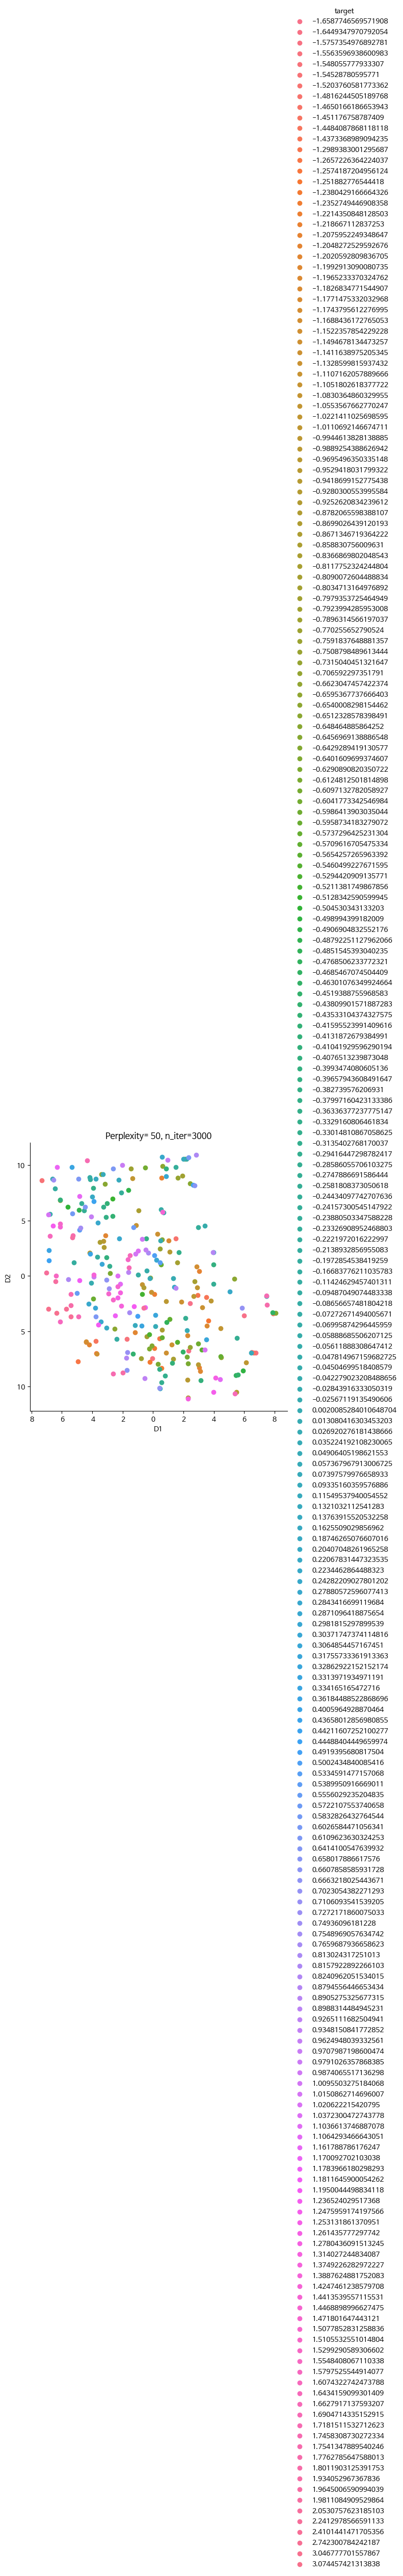

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

model = TSNE(n_components=2, random_state=0, perplexity= 50, n_iter=3000)
tsne_data = model.fit_transform(StandardScaler().fit_transform(scaled_df))
tsne_data = np.vstack((tsne_data.T, scaled_df.target)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("D1", "D2", "target"))

sns.FacetGrid(tsne_df, hue="target", height=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.title('Perplexity= 50, n_iter=3000')
plt.show()

#umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

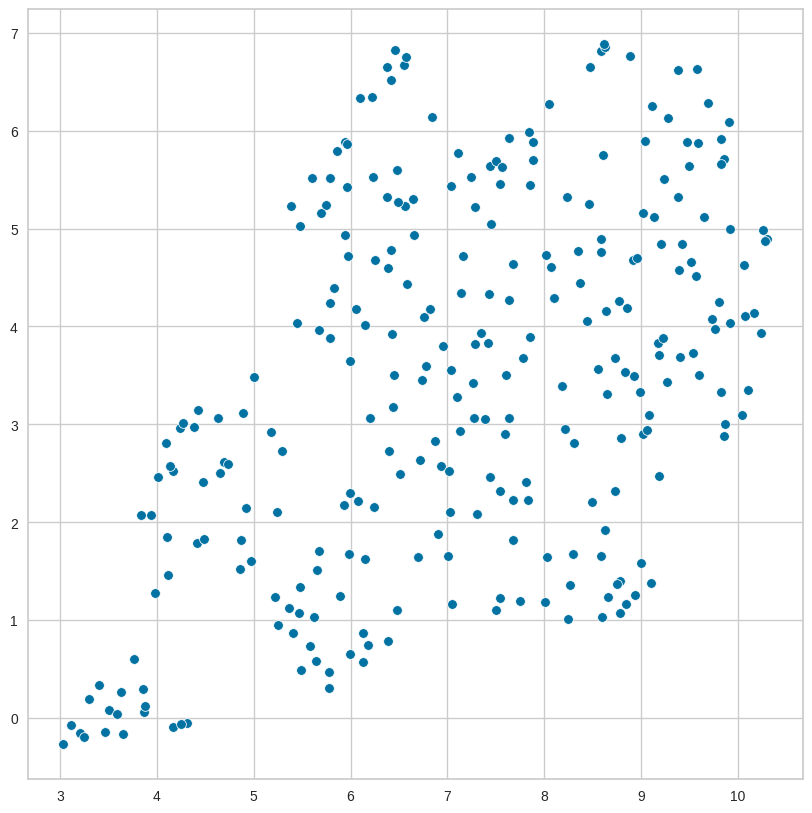

In [30]:
embedding_2d = umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=2).fit_transform(scaled_df.drop(['target'],axis=1).to_numpy())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = embedding_2d[:, 0], y = embedding_2d[:, 1], data=df)

In [31]:
import umap
embedding_3d = umap.UMAP(n_neighbors =30, min_dist=0.25,random_state = 42 ,n_components=3).fit_transform(scaled_df.drop(['target'],axis=1).to_numpy())



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [32]:
import plotly.express as px

plt.figure(figsize=(50,30))
umap_3d = px.scatter_3d(
    embedding_3d, x=0, y=1, z=2
)

umap_3d.update_traces(marker_size=2)
umap_3d.show()

<Figure size 5000x3000 with 0 Axes>

In [33]:
data_umap = pd.DataFrame(umap.UMAP(n_neighbors =15, min_dist=0.25,random_state = 42 ,n_components=3).fit_transform(scaled_df.drop(['target'],axis=1)),
                        columns = (["UM1","UM2","UM3"]))

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



# DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
dbscan = DBSCAN()
clusters = dbscan.fit_predict(data_umap)
print('클러스터 레이블:\n', clusters)

클러스터 레이블:
 [ 0  8  2  0  0 -1  1  2  2 -1  3 -1  0 10  8  1  0  1  1  0  0  0  3  4
 -1 -1  0  1  5  5  0 -1  4  0  2  2 -1  5  3  3  3  8  0 -1  6  7 -1 10
  0  7  3 11 -1  0 -1  1  0  8 10  0  9 19 -1 -1 11  7 10  0  6  0  1  0
  1  7 18  3 10  9  3 -1 11  4 12 13 14  3  3 12  3  4  4  4 14 17  3  4
  4 -1 14  4 14  4  5  3  4  4  3 13  4 11 -1  4 15  9  3 -1  5  5 12  9
 11  3  5  9  9  6 18  5 15 15  4  5  7 -1 18 18  9 -1 -1 12  0 14 13 -1
 -1 15 16 13 15  3 17  3 13 19  7 18  8  9 15  9  6  9 17 11 15  9  6 19
 11  6 14 -1 17  6 17  9 -1 19 -1 12 17  6  6  6 19  9 -1 -1 -1  6  0  0
 13 -1 13 -1  0  6 17 13  0 13 -1  9 17 -1 -1  9 -1 11  9  6 -1  9  9 -1
 -1  6  6 13 -1 17  6 17 -1 -1  9 17  0  7 -1 12 14 14 12  5 14 14 13  5
 12 14 12 16 14 12 12 12 -1 12 16 -1 14 14 12 14 12 14 12 12 12 14 12 14
 12 12 12 -1 14 14 12 16 16 12 12 16 12]


In [35]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.8 MB/s eta 0:00:00


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


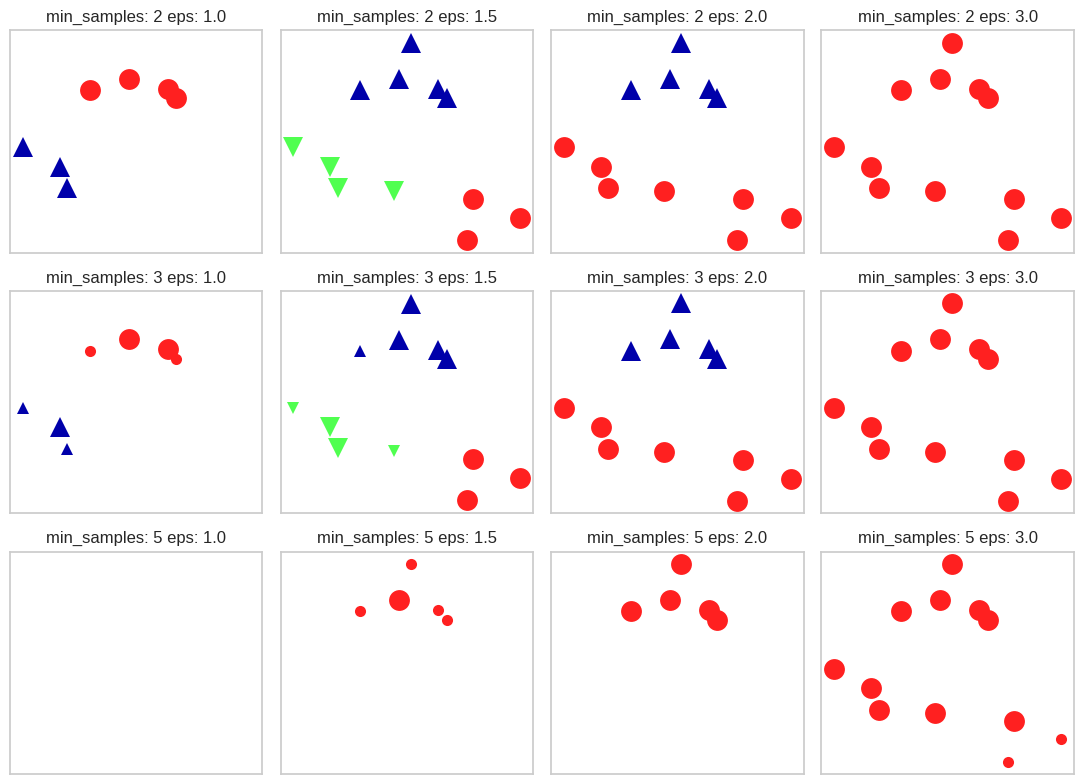

In [36]:
import mglearn
mglearn.plots.plot_dbscan()

In [37]:
data_umap.iloc[:,1]

0      8.396254
1      7.726618
2      6.392627
3      8.413280
4      8.104711
         ...   
272    6.409420
273    7.349208
274    7.755216
275    6.483196
276    7.521373
Name: UM2, Length: 277, dtype: float32

In [38]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

epsilon = 0.55
minimunSamples = 4
cluster_labels =  DBSCAN(eps = epsilon, min_samples = minimunSamples).fit_predict(data_umap)
cluster_labels

array([ 0,  1,  2,  0,  0,  1,  1,  2,  2, -1,  3,  1,  0,  1,  1,  1,  0,
        1,  1,  0,  0,  0,  3,  1,  1,  1,  0,  1,  1,  1,  0, -1,  1,  0,
        2,  2,  1,  1,  3,  3,  3,  1,  0,  0,  1,  1,  1,  1,  0,  1,  3,
        1,  0,  0, -1,  1,  0,  1,  1,  0,  1,  1, -1,  1,  1,  1,  1,  0,
        1,  0,  1,  0,  1,  1,  1,  3,  1,  1,  3,  0,  1,  1,  1,  2,  0,
        3,  3,  1,  3,  1,  1,  1,  0,  1,  3,  1,  1,  1,  0,  1,  0,  1,
        1,  3,  1,  1,  3,  2,  1,  1, -1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  2,  1,  1,  1,  4,  2,  1,  3,  1,  3,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  2,  0,  2,  1,  0,  1,  1,  2,  0,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  0

In [39]:
scaled_df['Cluster'] = cluster_labels
import plotly.express as px
# 3D 산점도 시각화
fig = px.scatter_3d(data_umap, x=data_umap.iloc[:,0], y=data_umap.iloc[:,1], z=data_umap.iloc[:,2],
    labels={'color': 'Cluster'},
    color= scaled_df['Cluster'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

In [40]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.model_selection import ParameterGrid
# best_score = -1
# best_eps = None
# best_min_samples = None

# for eps in [0.5, 0.7,1.0, 1.5,2.0]:
#     for min_samples in [2,3,5, 7, 10]:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         cluster_labels = dbscan.fit_predict(data_umap)
#         score = silhouette_score(data_umap, cluster_labels)
#         if score > best_score:
#             best_score = score
#             best_eps = eps
#             best_min_samples = min_samples

# print(f"Best Parameters: eps={best_eps}, min_samples={best_min_samples}")

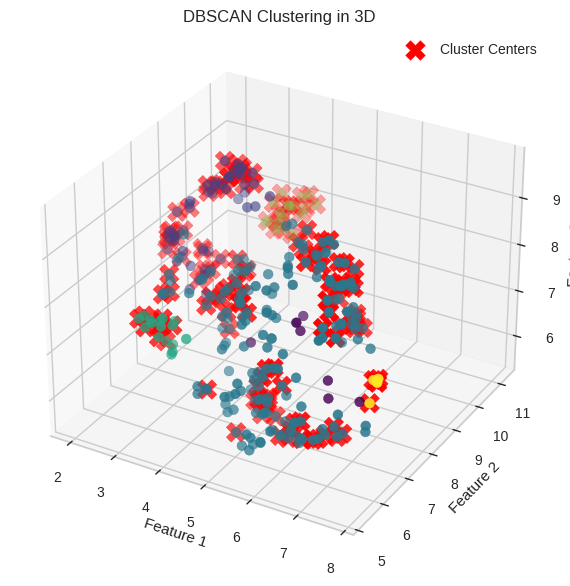

In [41]:
# 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 군집 별로 데이터를 색으로 구분하여 플로팅
scatter = ax.scatter(data_umap.iloc[:, 0], data_umap.iloc[:, 1], data_umap.iloc[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# 군집 중심 표시
centers = dbscan.components_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Cluster Centers')

# 범례 추가
ax.legend()

plt.title('DBSCAN Clustering in 3D')
plt.show()

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.



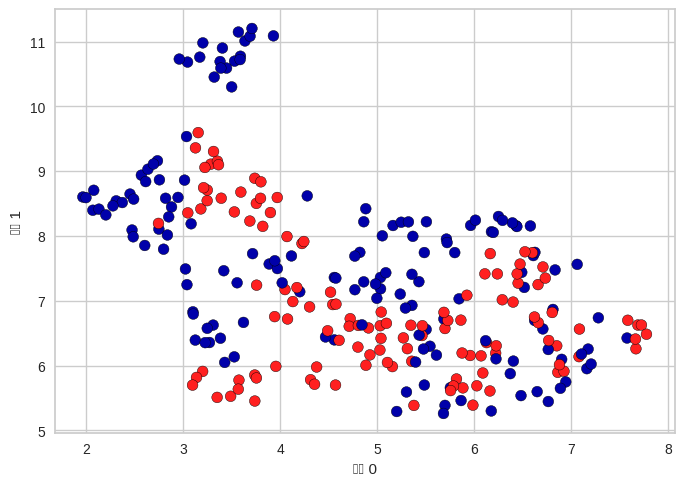

In [42]:
clusters = dbscan.fit_predict(data_umap)
# 클러스터 할당을 표시합니다
plt.scatter(data_umap.iloc[:, 0], data_umap.iloc[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# k-means 클러스터링

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

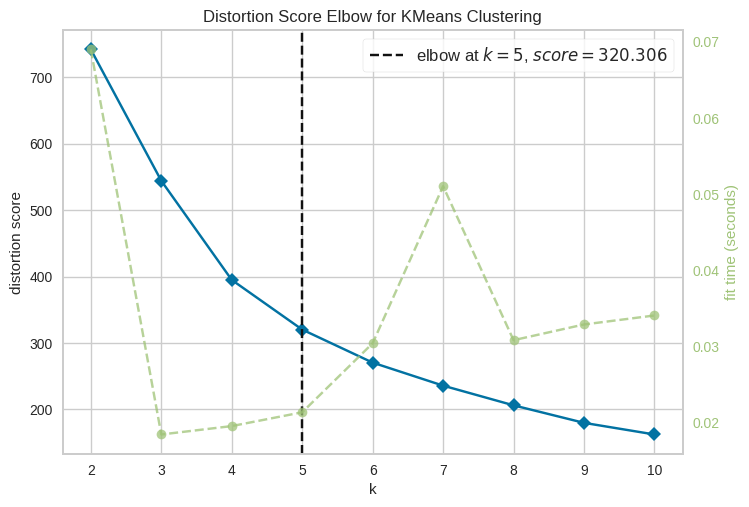

In [43]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_umap)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

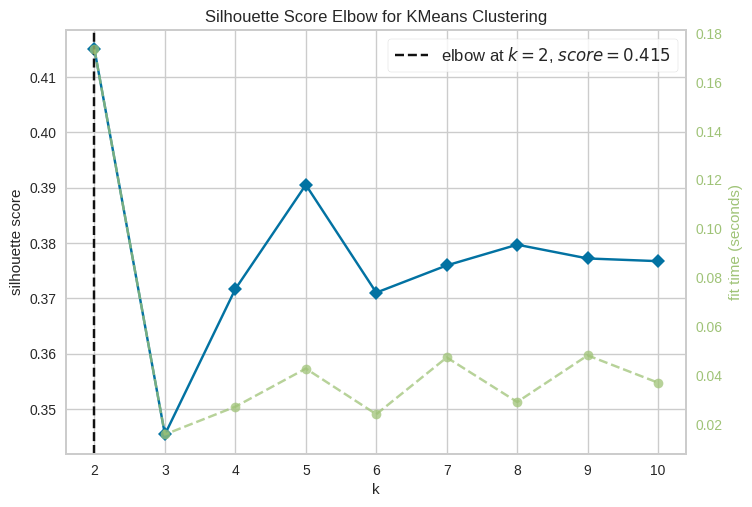

In [44]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(data_umap)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

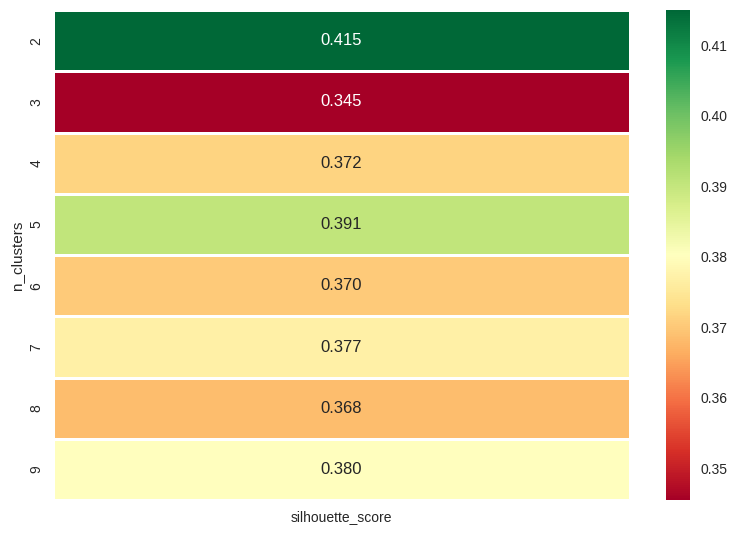

In [45]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()
visualize_silhouette_layer(data_umap)

In [46]:
# k=2으로 클러스터링 수행

km = KMeans(n_clusters=5, random_state=42)

yhat_AC = km.fit_predict(data_umap)

data_umap["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
scaled_df['Cluster'] = yhat_AC

# 3D 산점도 시각화
fig = px.scatter_3d(data_umap, x=data_umap.iloc[:,0], y=data_umap.iloc[:,1], z=data_umap.iloc[:,2],
    labels={'color': 'Cluster'},
    color= scaled_df['Cluster'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv', encoding='utf-8')
df["Clusters"]= yhat_AC        # for customers profiling

In [ ]:
data_scaled = scaled_df.drop(columns = ['target'],axis=1)

# pca로 해보기

In [ ]:
data_scaled = scaled_df

In [ ]:
data_scaled.head()

,총층수,출근_상내선_배차간격,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,0.026465,-0.906591,1.009166,-0.708879,-1.750697,0.509735,-0.525970,0.698157,0.147807,1.164773,1.589284,1.297030,1.261333,0.035342,1.362040,0.948291,2.546356
1,-1.064291,-0.892107,0.195037,0.372874,-1.750697,0.679036,-0.143834,0.702682,0.657793,-0.347863,0.243608,0.609603,-0.067029,0.754644,-0.186586,1.595398,0.515804
2,1.563800,-0.882995,1.721097,0.758968,-0.337442,-0.564536,0.179257,0.944116,0.755187,0.745580,-0.027244,1.031615,0.043579,0.469340,0.049606,1.289238,0.757150
3,0.026465,-0.931421,1.485401,-0.382441,-1.750697,0.083129,-1.596632,0.987973,0.263370,0.456684,0.966241,0.417393,0.694646,0.100751,0.689938,0.368081,1.720588
4,0.026465,-0.900113,1.347060,0.574708,-0.337442,0.828371,0.179257,0.160860,0.256495,0.281863,-0.148557,0.986077,1.511353,0.125526,1.003989,2.112079,2.034907


In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

variance_ratio = {}

for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [ ]:
variance_ratio

{'n_1': 0.31396612803407364,
 'n_2': 0.4951320422188603,
 'n_3': 0.6138820175573291,
 'n_4': 0.6980181856513354,
 'n_5': 0.7678672605170394,
 'n_6': 0.8218400998905765,
 'n_7': 0.8622921417824924,
 'n_8': 0.8951470797550063,
 'n_9': 0.9265734399054172,
 'n_10': 0.9510657475413908,
 'n_11': 0.9670864722643893,
 'n_12': 0.9784799651184887,
 'n_13': 0.9865285602174181,
 'n_14': 0.9917338520034736,
 'n_15': 0.9960885971811592,
 'n_16': 0.9992343287455578,
 'n_17': 0.9999999999999999}

In [ ]:
# eigenvector per each PC
data_pca7 = pd.DataFrame(pca.components_[0:7],
                         columns=data_scaled.columns,
                         index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']).T

data_pca7

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
총층수,-0.019920,0.116674,-0.162941,0.277423,0.696345,-0.255128,0.091204
출근_상내선_배차간격,0.000201,-0.025971,0.407261,-0.431891,-0.146009,-0.264470,0.297421
총사고발생수,-0.040220,0.086812,-0.490276,0.240550,-0.062594,-0.341490,0.362386
반경 내 학교 수,0.091630,-0.218702,-0.324777,-0.387945,0.199599,0.056799,0.217565
반경 내 주요공원 수,0.078701,0.105005,-0.199562,-0.432091,0.071411,-0.550677,-0.653347
반경 아파트 수,-0.052014,-0.212005,-0.207904,-0.263257,0.367646,0.583047,-0.211512
공공 자전거 시설 수,-0.069334,0.129098,-0.333865,-0.470456,-0.121612,0.036961,0.413227
출근출발_HH,-0.361484,-0.232871,-0.001992,-0.017346,0.118938,-0.107944,0.048901
출근출발_HW,-0.232475,-0.434527,0.046144,0.088070,-0.048083,-0.091237,-0.081941
출근출발_WH,-0.390491,0.167783,0.044208,-0.059119,-0.002944,0.026347,0.011854


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning:

Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.

/usr/loca

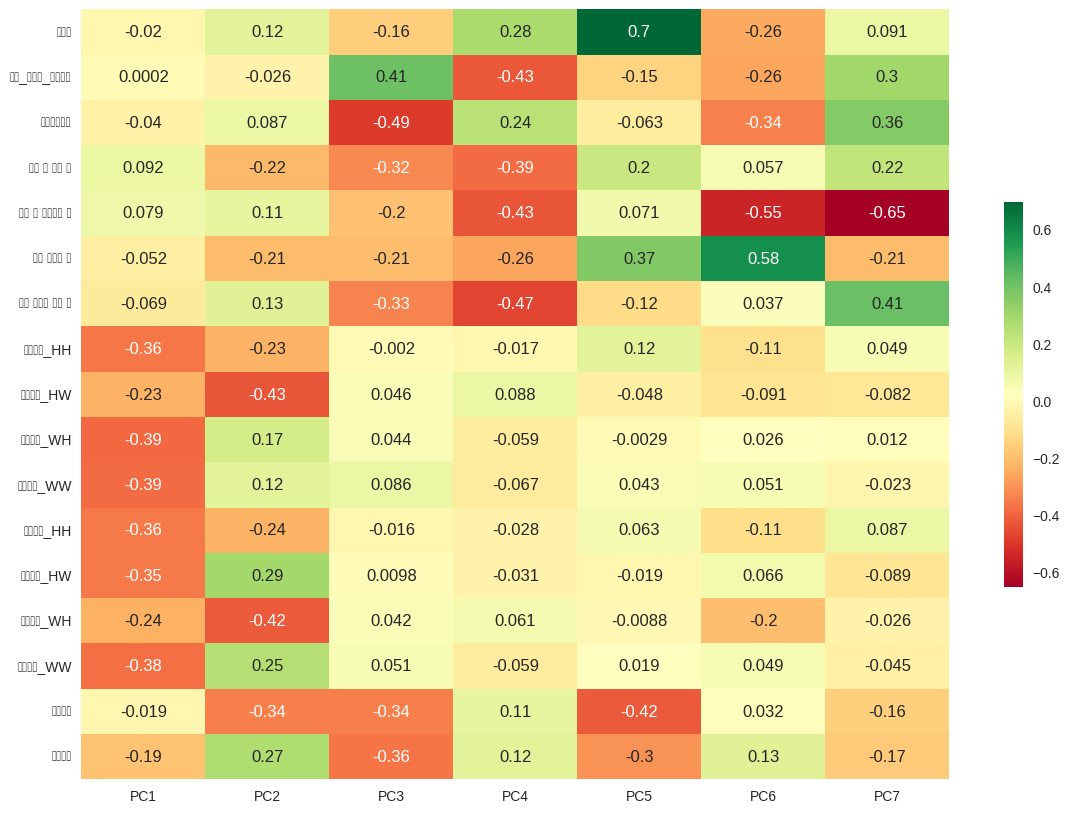

In [ ]:
# heatmap for each loading(value of the elements of eigenvector against each principal component.)

plt.figure(figsize=(14, 10))
sns.heatmap(data_pca7,
            annot=True,
            cmap='RdYlGn',
            cbar_kws={'shrink' : 0.5}
           )

plt.show()

<ipython-input-41-a15f0c585218>:8: MatplotlibDeprecationWarning:

Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



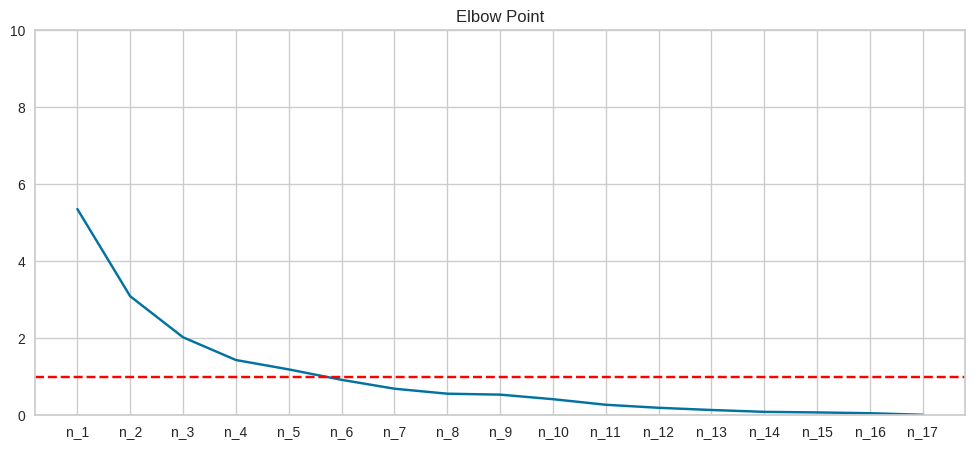

In [ ]:
# eigen value
import numpy as np
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')

plt.show()

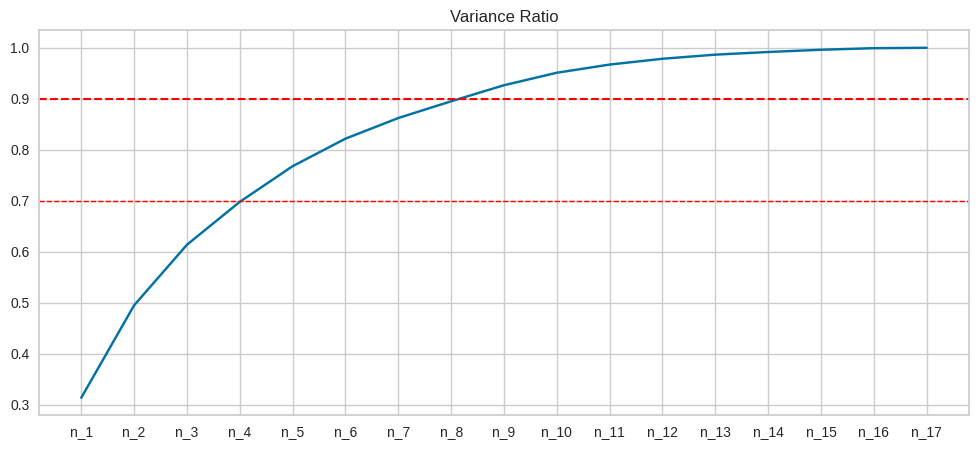

In [ ]:
plt.figure(figsize = (12, 5))

plt.plot(variance_ratio.keys(), variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--', lw = 1)
plt.axhline(0.9, color = 'red', ls = '--', lw = 1.5)
plt.title("Variance Ratio")

plt.show()

In [ ]:
data_scaled.head()

NameError: ignored

In [ ]:
pca = PCA(n_components = 6, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled),
                        columns = (["PC1", "PC2", "PC3", "PC4", "PC5","PC6"]))

## k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

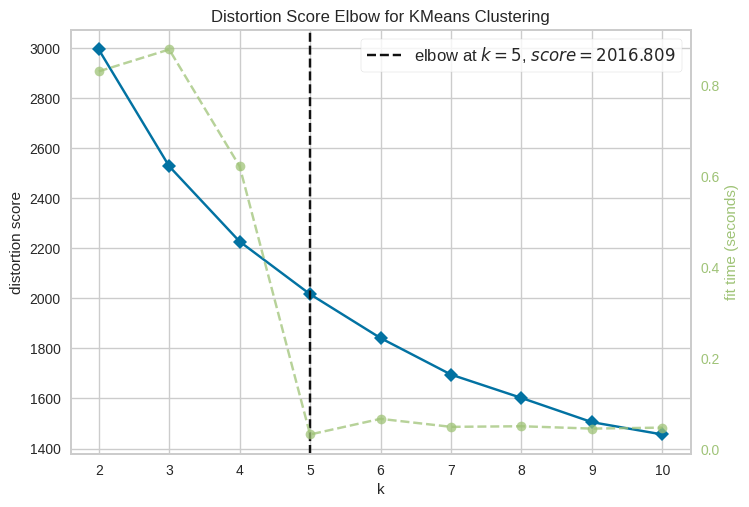

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

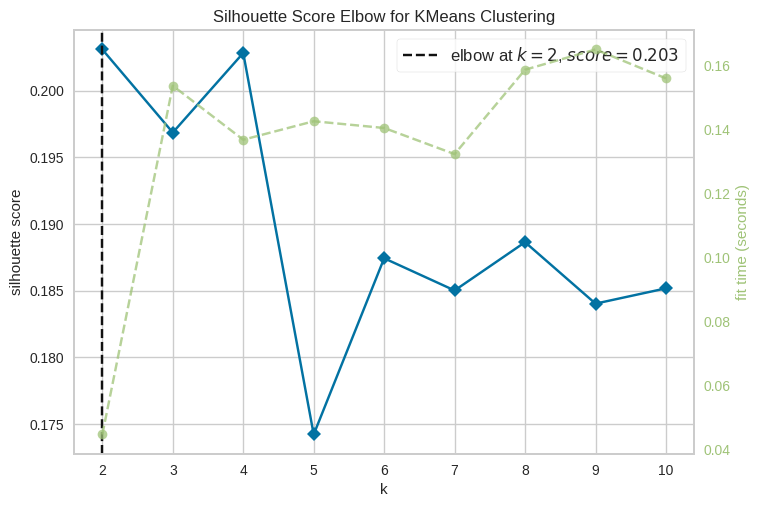

In [ ]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10, metric='silhouette')
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

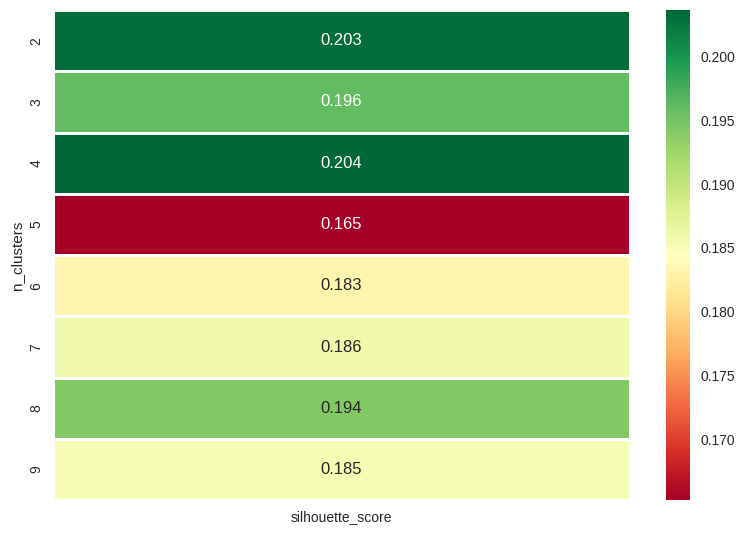

In [ ]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()
visualize_silhouette_layer(data_pca)

In [ ]:
# k=2으로 클러스터링 수행

km = KMeans(n_clusters=4, random_state=42)

yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC   # for evaluating the model
df["Clusters"]= yhat_AC        # for customers profiling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Clusters
0,-3.526601,0.814459,-1.215643,1.866247,-0.879651,1.461798,3
1,-0.914948,-1.929713,-0.841782,0.960062,-1.146516,1.565794,0
2,-1.522299,-0.785856,-2.229799,1.375572,0.364983,-1.068465,0
3,-2.112147,0.249081,-0.722054,2.494607,-0.424000,0.837033,3
4,-1.979345,-0.058993,-2.783550,0.695996,-1.024094,0.776119,3


In [ ]:

import plotly.express as px
# 3D 산점도 시각화
fig = px.scatter_3d(data_pca, x=data_pca.iloc[:,0], y=data_pca.iloc[:,1], z=data_pca.iloc[:,2],
    labels={'color': 'Clusters'},
    color= data_pca['Clusters'],
    color_discrete_sequence=['red', 'seagreen', 'gold', 'black'],
)
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

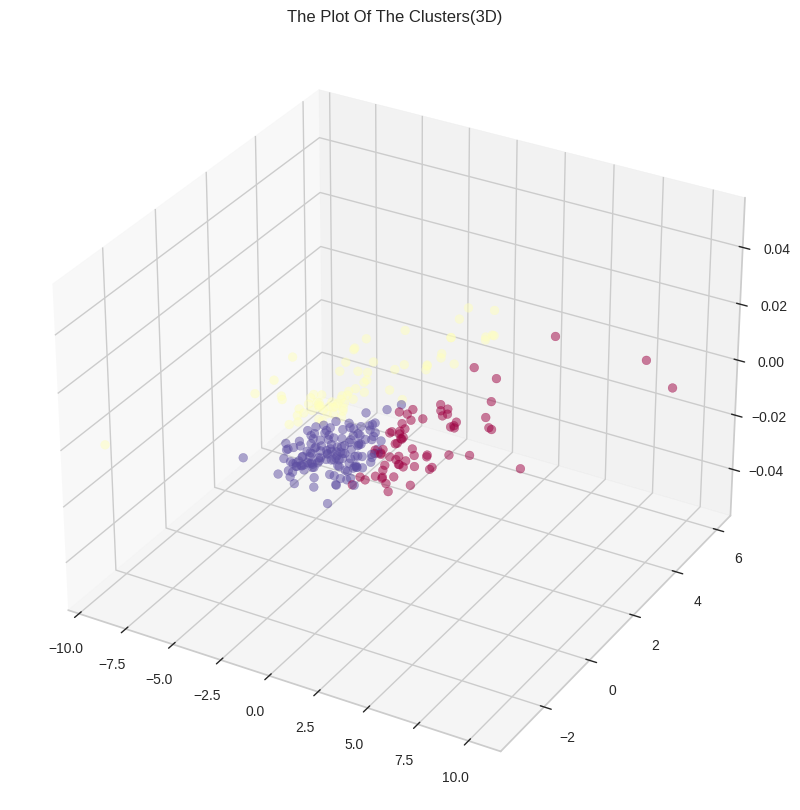

In [ ]:
# 3 dimension

x =data_pca["PC1"]
y =data_pca["PC2"]
z =data_pca["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, s=40, c=data_pca["Clusters"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

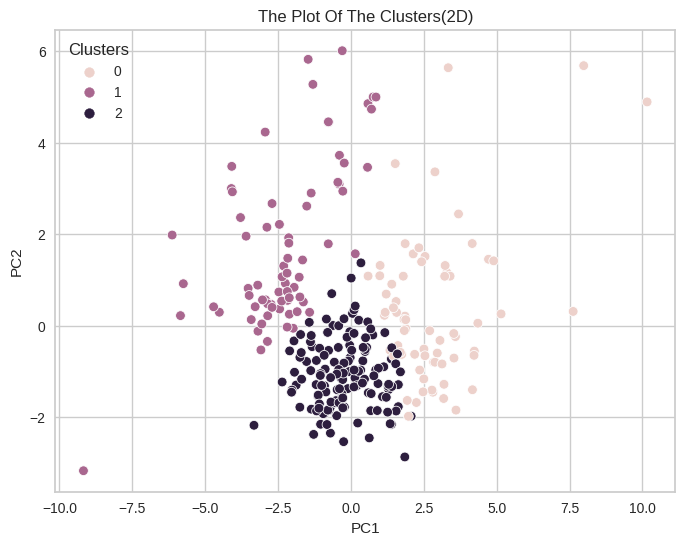

In [ ]:
# 2 dimension

plt.figure(figsize=(8,6))

sns.scatterplot(data = data_pca, x = 'PC1', y='PC2', hue='Clusters')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [ ]:
df[df["Clusters"]==2]

,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원,Clusters
1,2,4.581897,315530.0,2,9,0,7,5,71.0,2316,122460,1803,3298,2205,88296,2753,2462,258389,106221,2
2,5,4.600877,374321.0,10,11,1,2,6,58.4,2599,130241,3677,2820,2705,98437,2361,2936,197069,133621,2
5,3,4.581897,253069.0,3,13,1,4,6,61.7,1878,100848,1592,2377,1580,39976,2083,1984,237260,74761,2
7,5,4.763636,232188.0,1,9,1,9,5,115.2,2048,144311,2075,4332,1972,117397,2150,3382,127600,132321,2
8,5,4.574561,269537.0,7,15,1,7,6,89.3,2011,102119,2232,2263,2049,56157,2374,1860,211760,106834,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2,9.566038,NaN,0,11,1,9,9,70.0,2091,109834,2073,3699,2147,49610,2607,2606,67540,21757,2
270,2,9.940821,NaN,0,9,3,7,7,147.0,2002,146388,1256,2481,1765,39238,2944,1569,200752,39294,2
273,2,8.483333,193255.0,0,5,2,5,3,0.0,1753,92260,2647,2773,1580,69286,2374,2377,106899,43453,2
274,3,9.496855,NaN,0,14,3,17,5,82.0,1787,120945,1677,2944,1487,74980,2054,2205,55021,52167,2


차원 축소 umap에 k-means 클러스터링으로 결정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   총층수                 277 non-null    int64  
 1   출근_상내선_배차간격         277 non-null    float64
 2   환승유입인원수             252 non-null    float64
 3   총사고발생수              277 non-null    int64  
 4   반경 내 학교 수           277 non-null    int64  
 5   반경 내 주요공원 수         277 non-null    int64  
 6   반경 아파트 수            277 non-null    int64  
 7   공공 자전거 시설 수         277 non-null    int64  
 8   출근시간 혼잡도 평균(상선,내선)  277 non-null    float64
 9   출근출발_HH             277 non-null    int64  
 10  출근출발_HW             277 non-null    int64  
 11  출근출발_WH             277 non-null    int64  
 12  출근출발_WW             277 non-null    int64  
 13  출근도착_HH             277 non-null    int64  
 14  출근도착_HW             277 non-null    int64  
 15  출근도착_WH             277 non-null    int64  
 16  출근도착_WW 

In [ ]:
print( df.groupby('Clusters')['환승유입인원수'])

In [49]:
df['환승유입인원수'] = df.groupby('Clusters')['환승유입인원수'].transform(lambda x: x.fillna(x.mean()))


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선명                 277 non-null    int64  
 1   지하철역                277 non-null    object 
 2   총층수                 277 non-null    int64  
 3   출근_상내선_배차간격         277 non-null    float64
 4   승차인원_0708           277 non-null    int64  
 5   승차인원_0809           277 non-null    int64  
 6   승차인원_0910           277 non-null    int64  
 7   하차인원_0708           277 non-null    int64  
 8   하차인원_0809           277 non-null    int64  
 9   하차인원_0910           277 non-null    int64  
 10  환승유입인원수             277 non-null    float64
 11  총사고발생수              277 non-null    int64  
 12  반경 내 학교 수           277 non-null    int64  
 13  반경 내 주요공원 수         277 non-null    int64  
 14  반경 아파트 수            277 non-null    int64  
 15  반경 내 대학교 수          277 non-null    int64  
 16  공공 자전거 시

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/최종데이터프레임.csv",index=False)

In [52]:
df.drop('Clusters',axis = 1, inplace = True)

In [54]:
df.head(10)

,호선명,지하철역,총층수,출근_상내선_배차간격,승차인원_0708,승차인원_0809,승차인원_0910,하차인원_0708,하차인원_0809,하차인원_0910,...,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW
0,2,강남,3,4.551724,36176,60473,49096,138873,293325,300163,...,4,41.7,2311,88696,4832,7179,3076,325838,1869,7809
1,2,강변,2,4.581897,73477,107711,77201,24293,44236,37692,...,5,71.0,2316,122460,1803,3298,2205,88296,2753,2462
2,2,건대입구,5,4.600877,49601,88230,59238,24521,59571,49529,...,6,58.4,2599,130241,3677,2820,2705,98437,2361,2936
3,2,교대,3,4.500000,24068,34642,28511,52910,146658,134416,...,2,42.3,2654,95422,3046,5008,2009,186677,1936,4732
4,2,구로디지털단지,3,4.565217,127585,174194,106382,79227,234611,136484,...,6,79.4,1788,95008,2718,2629,2646,416612,1962,5980
5,2,구의,3,4.581897,64255,108550,64455,14680,36955,23126,...,6,61.7,1878,100848,1592,2377,1580,39976,2083,1984
6,2,낙성대,2,4.534483,76650,120891,76419,18475,37360,31071,...,9,40.2,1095,133747,772,1750,1103,34270,2246,960
7,2,당산,5,4.763636,42430,52674,32496,27214,71356,33751,...,5,115.2,2048,144311,2075,4332,1972,117397,2150,3382
8,2,대림,5,4.574561,62692,89988,59080,21657,52554,32623,...,6,89.3,2011,102119,2232,2263,2049,56157,2374,1860
9,2,도림천,5,9.705882,3222,3463,2005,3794,5753,2288,...,4,36.4,1242,116325,1497,3114,1174,77957,1521,2167


In [ ]:
import pandas as pd
df_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/통계학과경진대회/데이터/cluster_end.csv")

In [ ]:
df_1.drop("Clusters",axis = 1, inplace = True)

In [ ]:
df_1.head(10)

,총층수,출근_상내선_배차간격,환승유입인원수,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 아파트 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_HH,출근출발_HW,출근출발_WH,출근출발_WW,출근도착_HH,출근도착_HW,출근도착_WH,출근도착_WW,승차인원,하차인원
0,3,4.551724,831737.0,5,5,0,6,4,41.7,2311,88696,4832,7179,3076,325838,1869,7809,145745,732361
1,2,4.581897,315530.0,2,9,0,7,5,71.0,2316,122460,1803,3298,2205,88296,2753,2462,258389,106221
2,5,4.600877,374321.0,10,11,1,2,6,58.4,2599,130241,3677,2820,2705,98437,2361,2936,197069,133621
3,3,4.500000,367316.0,8,6,0,4,2,42.3,2654,95422,3046,5008,2009,186677,1936,4732,87221,333984
4,3,4.565217,731249.0,7,10,1,8,6,79.4,1788,95008,2718,2629,2646,416612,1962,5980,408161,450322
5,3,4.581897,253069.0,3,13,1,4,6,61.7,1878,100848,1592,2377,1580,39976,2083,1984,237260,74761
6,2,4.534483,314016.0,1,12,2,2,9,40.2,1095,133747,772,1750,1103,34270,2246,960,273960,86906
7,5,4.763636,232188.0,1,9,1,9,5,115.2,2048,144311,2075,4332,1972,117397,2150,3382,127600,132321
8,5,4.574561,269537.0,7,15,1,7,6,89.3,2011,102119,2232,2263,2049,56157,2374,1860,211760,106834
9,5,9.705882,22197.0,1,10,1,13,4,36.4,1242,116325,1497,3114,1174,77957,1521,2167,8690,11835
